In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from Utils_plot import plot_hist

print(cv2.__version__)
np.set_printoptions(suppress=True)

img = cv2.imread('figures/dog.jpg')
img_rotate = cv2.imread('figures/dog_rotate.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)
print(img.shape)
print(img_rotate.shape)

hist = cv2.calcHist([img], [0], None, [36], [0, 256])
hist_r = cv2.calcHist([img_rotate], [0], None, [36], [0, 256])
plt.plot(hist)
plt.plot(hist_r)
plt.xlim([0, 36])
plt.show()

3.4.2
(576, 768)
(576, 768)


<Figure size 640x480 with 1 Axes>

14.212670403551895
14.212670403551895


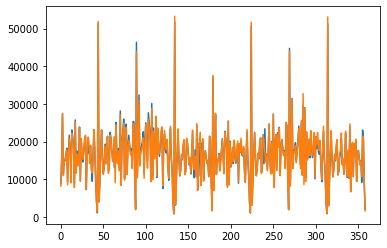

In [12]:
def histogram_gradient(img, img_rotate, mag_thres = 20, bin_num = 360):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_rotate = cv2.cvtColor(img_rotate, cv2.COLOR_BGR2GRAY)

    for img in [img, img_rotate]:
        sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
        sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
        gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
        magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
        mag_thres = np.median(magnitude)
        print(mag_thres)
        gradient = (masgnitude > mag_thres) * gradient
        gradient = (gradient < 0) * 360 + gradient
        hist, bins = np.histogram(gradient, bin_num)
        hist = hist[1:]
        
        plt.plot(hist)
    #plt.xlim([1, bin_num])
    #plt.ylim([0, 15000])
    plt.show()
    
img = cv2.imread('figures/0.jpeg')
img_rotate = cv2.imread('figures/10.jpeg')

histogram_gradient(img, img_rotate)  

## Calculation the translation variable

In [4]:
print(hist.shape)
print(hist_r.shape)

(36, 1)
(36, 1)


In [11]:
base_HoG = hist
rotate_HoG = hist_r
m, n = base_HoG.shape

limits = 10
error = np.array([])
for i in range(-limits, limits + 1):
    base_begin = max(0, i)
    base_end = min(m, m + i)
    
    rotate_begin = max(0, -i)
    rotate_end = min(m, m - i)
    
    base_line = base_HoG[base_begin:base_end, :]
    rotate_line = rotate_HoG[rotate_begin:rotate_end, :]
    
    error = np.append(error, np.mean((base_line - rotate_line) **2))
    
angle = np.argmin(error) - limits

[4.22398432e+08 3.76834816e+08 3.21708576e+08 2.64702144e+08
 2.14303744e+08 1.74068336e+08 1.39056304e+08 1.02073272e+08
 6.18742720e+07 2.22742080e+07 3.15189360e+07 4.47144680e+07
 7.50803120e+07 1.16687096e+08 1.58162496e+08 1.96892224e+08
 2.36500976e+08 2.87980576e+08 3.46957792e+08 4.02056352e+08
 4.51645248e+08]
-1


In [3]:
def angle_HoG(base_HoG, rotate_HoG, limits = 10):
    m, n = base_HoG.shape
    
    error = np.array([])
    for i in range(-limits, limits + 1):
        base_begin = max(0, i)
        base_end = min(m, m + i)

        rotate_begin = max(0, -i)
        rotate_end = min(m, m - i)

        base_line = base_HoG[base_begin:base_end, :]
        rotate_line = rotate_HoG[rotate_begin:rotate_end, :]

        error = np.append(error, np.mean((base_line - rotate_line) **2))

    angle = np.argmin(error) - limits
    
    return angle

angle_HoG(hist, hist_r)

-1

## Test about the gradient

In [63]:
a = np.eye(5)
m = np.linspace(20, 0, 5)
n = np.linspace(0, 20, 5)
grid = np.meshgrid(m, n)
a = grid[0]
b = grid[1]
print("The a is \n", a)
#filter_kernal = 

sobelx=cv2.Sobel(a, cv2.CV_64F, dx=1, dy=0)
print("The sobelx is \n", sobelx)
sobely=cv2.Sobel(a, cv2.CV_64F, dx=0, dy=1)
print("The sobely is \n", sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print("The gradient is \n", gradient)

print("---" * 10)
print("The a is \n", b)
sobelx=cv2.Sobel(b, cv2.CV_64F, dx=1, dy=0)
print("The sobelx is \n", sobelx)
sobely=cv2.Sobel(b, cv2.CV_64F, dx=0, dy=1)
print("The sobely is \n", sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print("The gradient is \n", gradient)

a = np.linspace(-1, 1, 3)
a = np.meshgrid(a, a)
gradient = np.arctan2(a[1], a[0]) * 180 / np.pi
print(a[0])
print(a[1])
print(gradient)

The a is 
 [[20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]
 [20. 15. 10.  5.  0.]]
The sobelx is 
 [[  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]
 [  0. -40. -40. -40.   0.]]
The sobely is 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
The gradient is 
 [[  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]
 [  0. 180. 180. 180.   0.]]
------------------------------
The a is 
 [[ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]
 [10. 10. 10. 10. 10.]
 [15. 15. 15. 15. 15.]
 [20. 20. 20. 20. 20.]]
The sobelx is 
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
The sobely is 
 [[ 0.  0.  0.  0.  0.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [ 0.  0.  0.  0.  0.]]
The gradient is 
 [[ 0.  0.  0.  0.  0.]
 [90. 90. 90

[[-1.66701619 -0.5412203   1.46172758]
 [-2.39129728  0.64310569  0.46071681]
 [ 1.40189124  0.49331908 -0.80849176]
 [-2.28529149  1.09738477 -0.90333812]
 [ 1.03727192 -0.83296867  1.42432696]]
[[-0.         -0.          1.46172758]
 [-0.          0.          0.        ]
 [ 1.40189124  0.         -0.        ]
 [-0.          1.09738477 -0.        ]
 [ 1.03727192 -0.          1.42432696]]
(10,)


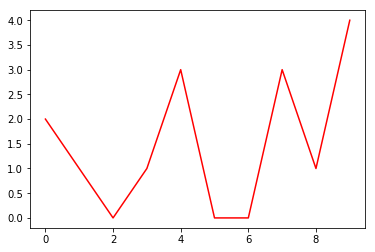

In [58]:
a = np.random.randn(5, 3)
print(a)

print((a > 1) * a)
gradient, bins = np.histogram(a)
print(gradient.shape)

plt.plot(gradient, 'r')

plt.show()

[[ 0.     0.     0.    ...  0.     0.     0.   ]
 [90.     0.    15.266 ... 21.23  28.94  90.   ]
 [90.    45.     0.    ... 26.48  48.6   90.   ]
 ...
 [90.    26.56  81.94  ... 13.39  28.5   90.   ]
 [90.    53.78  55.53  ...  2.246 21.61  90.   ]
 [ 0.     0.     0.    ...  0.     0.     0.   ]]


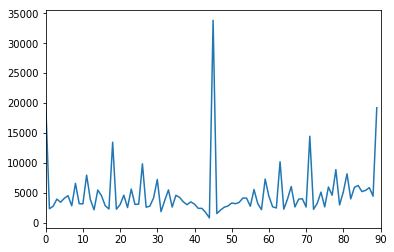

In [43]:
img = np.eye(5)

sobelx=cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0)
print(sobelx)
sobelx=cv2.convertScaleAbs(sobelx)
sobely=cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1)
sobely=cv2.convertScaleAbs(sobely)
gradient = np.arctan2(sobely, sobelx) * 180 / np.pi
print(gradient)

num_bins = 36
hist, bins = np.histogram(gradient.ravel(), 90, [0, 90])

plt.plot(hist)
plt.xlim([0, 90])
plt.show()